In [1]:
import numpy as np
import matplotlib.pyplot as plt

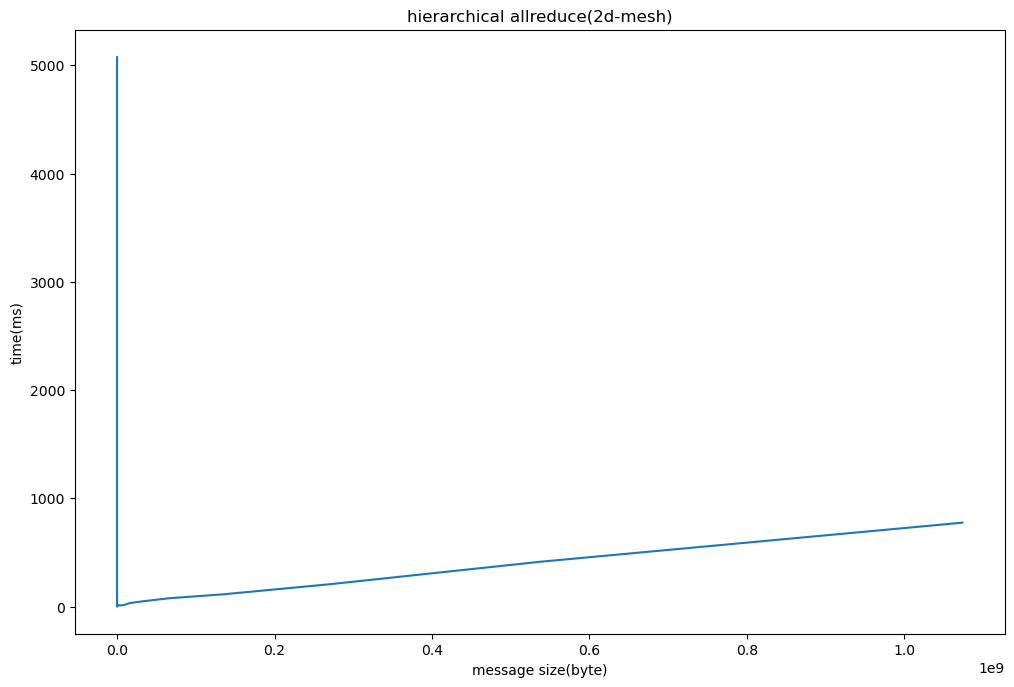

In [96]:
def read_hvd(filename, arrlen=29):
    
    with open(filename, 'r') as f:
        content = f.read()

    arr = content.split(",")
    arr = arr[:-1]
    
    resultlen = len(arr)/arrlen
    
    result = {}
    y = []
    for i in range(arrlen):
        result[i] = 0

    for i in range(len(arr)):
        j = i % arrlen
        result[j] += float(arr[i])

    for i in range(arrlen):
        result[i] /= resultlen
        y.append(result[i])
    
    # 32-bit floating number is 4 byte
    x = [2**i *4 for i in range(arrlen)]
    
    x = np.array(x)
    y = np.array(y)

    return x.astype('float'), y.astype('float')

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
x, y = read_hvd("./data/horovod-results/15gpu/10g-15gpu-2dmesh.txt")
plt.plot(x,y)
plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
# nccl_reducescatter+mpi_allreduce+mpi_allgather
plt.title('hierarchical allreduce(2d-mesh)')
plt.show()

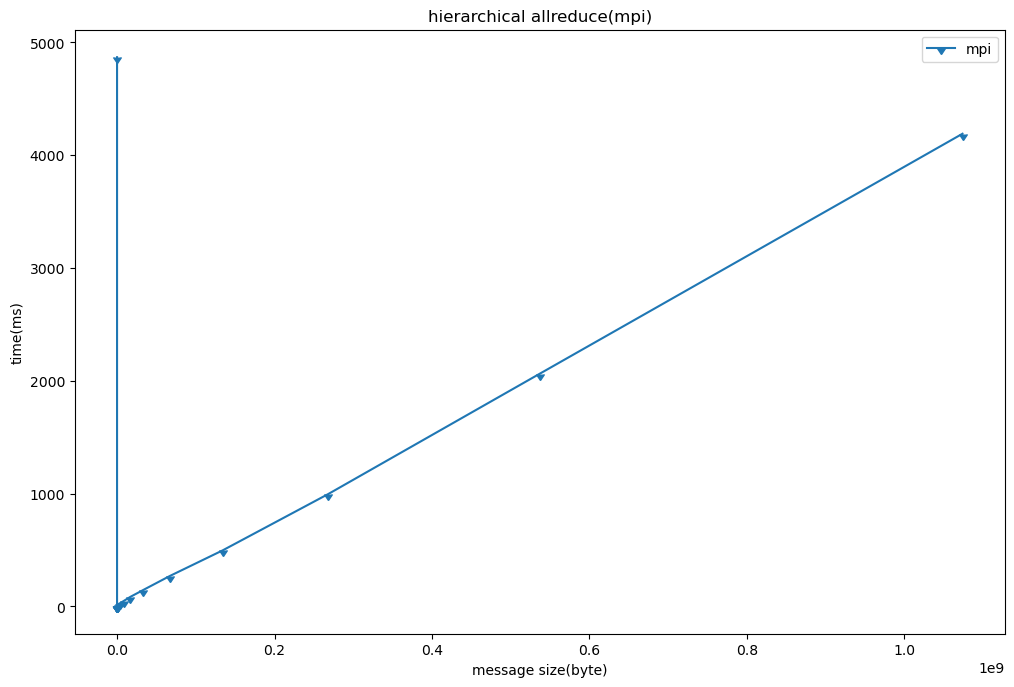

In [47]:

x1, y1 = read_hvd("./data/horovod-results/15gpu/10g-15gpu-mpi.txt")
# plt.plot(x,y, marker=11, label='h')
plt.plot(x1,y1, marker=11, label='mpi')
plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
plt.legend()
# mpi_allreduce
plt.title('hierarchical allreduce(mpi)')
plt.show()

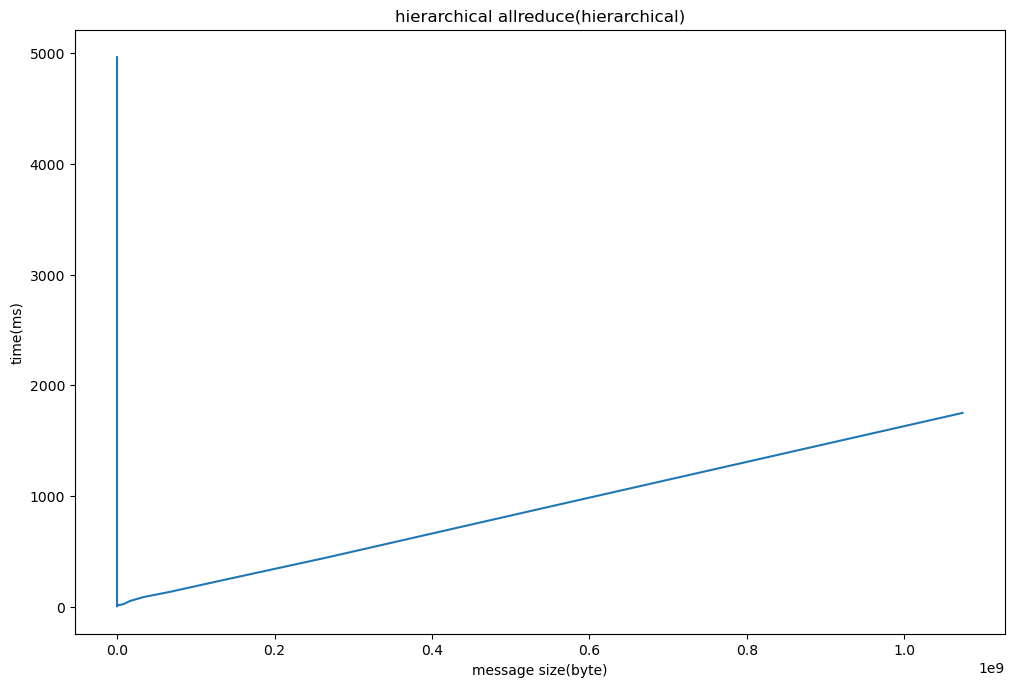

In [48]:

x2, y2 = read_hvd("./data/horovod-results/15gpu/10g-15gpu-h.txt")
plt.plot(x2,y2)
plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
# nccl_reduce+mpi_allreduce+nccl_bcast
plt.title('hierarchical allreduce(hierarchical)')
plt.show()

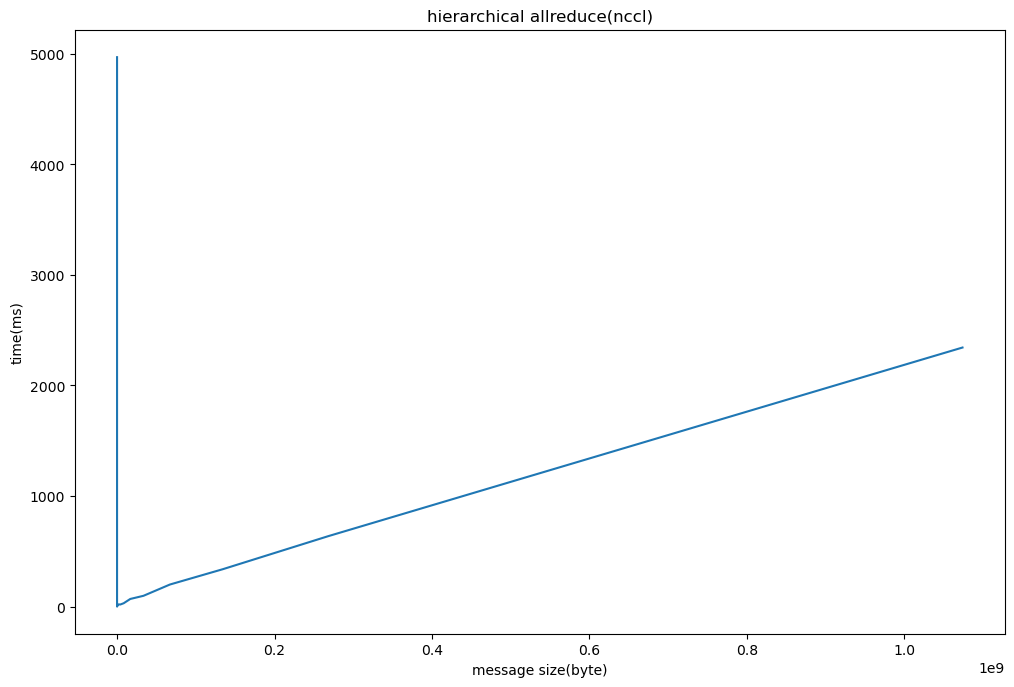

In [53]:
x3, y3 = read_hvd("./data/horovod-results/15gpu/10g-15gpu-nccl.txt")
plt.plot(x3,y3)
plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
# nccl_reduce+nccl_allreduce+nccl_bcast
plt.title('hierarchical allreduce(nccl)')
plt.show()

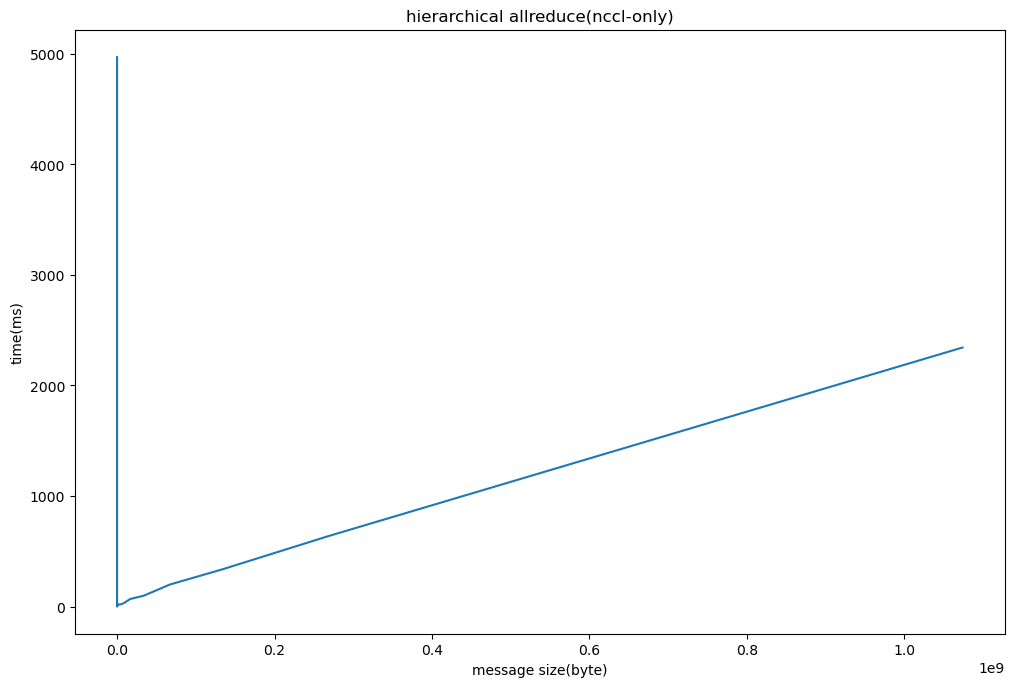

In [55]:
x4, y4 = read_hvd("./data/15gpu/10g-15gpu-nccl-only.txt")
plt.plot(x3,y3)
plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
# nccl_reduce+nccl_allreduce+nccl_bcast
plt.title('hierarchical allreduce(nccl-only)')
plt.show()

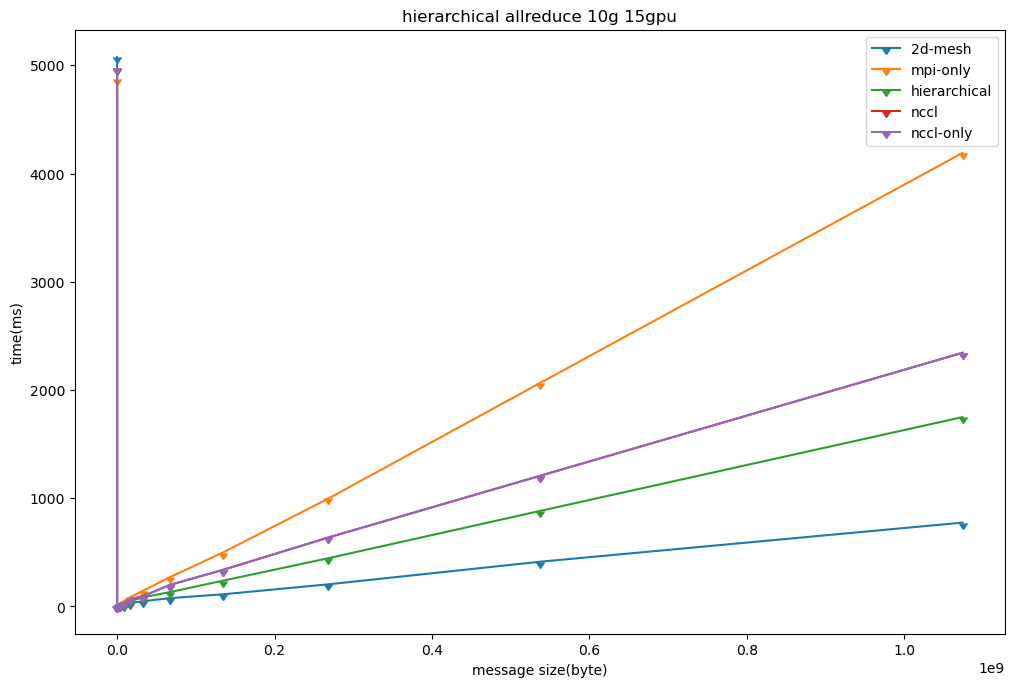

In [57]:
plt.plot(x,y, marker=11, label='2d-mesh')
plt.plot(x1,y1, marker=11, label='mpi-only')
plt.plot(x2,y2, marker=11, label='hierarchical')
plt.plot(x3,y3, marker=11, label='nccl')
plt.plot(x3,y3, marker=11, label='nccl-only')


plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
plt.legend()
# mpi_allreduce
plt.title('hierarchical allreduce 10g 15gpu')
plt.show()

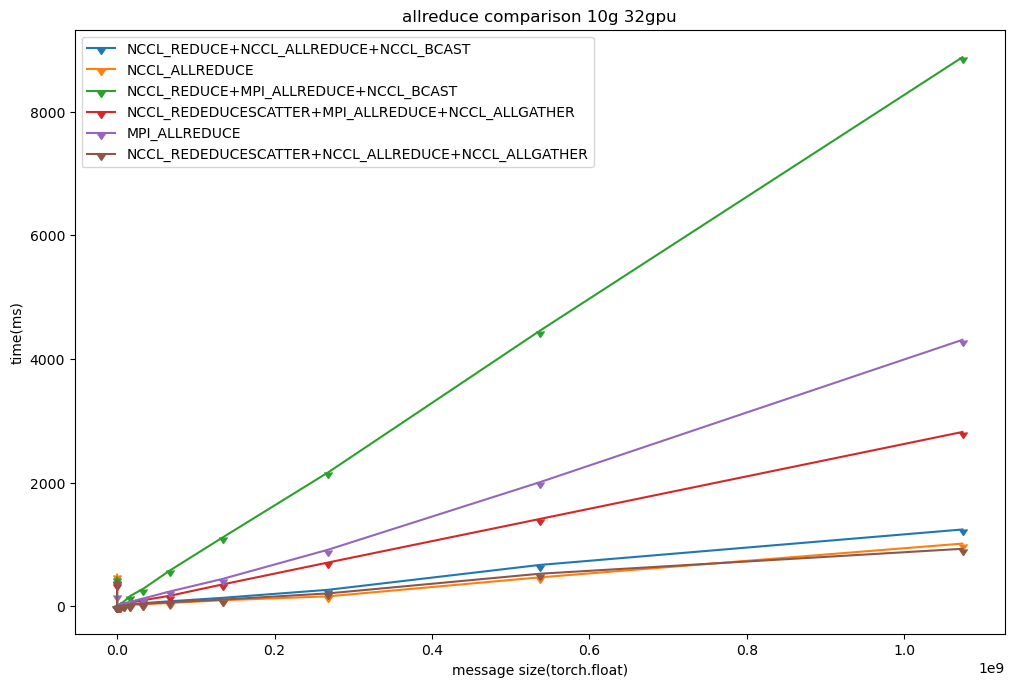

In [78]:
x1, y1 = read_hvd("./data/horovod-results/32gpu/10g-32gpu-nccl.txt")
x2, y2 = read_hvd("./data/horovod-results/32gpu/10g-32gpu-nccl-only.txt")
x3, y3 = read_hvd("./data/horovod-results/32gpu/10g-32gpu-2dmesh-4.txt")
x4, y4 = read_hvd("./data/horovod-results/32gpu/10g-32gpu-h-4.txt")
x5, y5 = read_hvd("./data/horovod-results/32gpu/10g-32gpu-mpi.txt")
x6, y6 = read_hvd("./data/horovod-results/32gpu/10g-32gpu-newnccl.txt")


plt.plot(x1,y1, marker=11, label='NCCL_REDUCE+NCCL_ALLREDUCE+NCCL_BCAST')
plt.plot(x2,y2, marker=11, label='NCCL_ALLREDUCE')
plt.plot(x3,y3, marker=11, label='NCCL_REDUCE+MPI_ALLREDUCE+NCCL_BCAST')
plt.plot(x4,y4, marker=11, label='NCCL_REDEDUCESCATTER+MPI_ALLREDUCE+NCCL_ALLGATHER')
plt.plot(x5,y5, marker=11, label='MPI_ALLREDUCE')
plt.plot(x6,y6, marker=11, label='NCCL_REDEDUCESCATTER+NCCL_ALLREDUCE+NCCL_ALLGATHER')


plt.xlabel('message size(torch.float)')
plt.ylabel('time(ms)')
plt.legend()
# mpi_allreduce
plt.title('allreduce comparison 10g 32gpu')
plt.show()

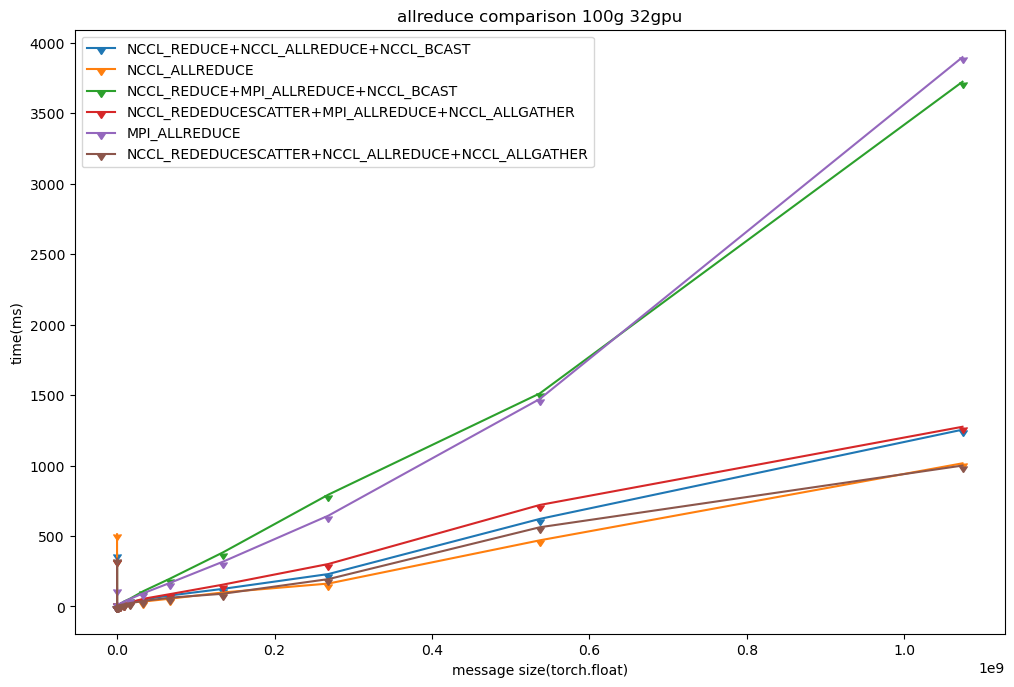

In [79]:
x1, y1 = read_hvd("./data/horovod-results/32gpu/100g-32gpu-nccl.txt")
x2, y2 = read_hvd("./data/horovod-results/32gpu/10g-32gpu-nccl-only.txt")
x3, y3 = read_hvd("./data/horovod-results/32gpu/100g-32gpu-2dmesh-4.txt")
x4, y4 = read_hvd("./data/horovod-results/32gpu/100g-32gpu-h-4.txt")
x5, y5 = read_hvd("./data/horovod-results/32gpu/100g-32gpu-mpi.txt")
x6, y6 = read_hvd("./data/horovod-results/32gpu/100g-32gpu-newnccl.txt")

plt.plot(x1,y1, marker=11, label='NCCL_REDUCE+NCCL_ALLREDUCE+NCCL_BCAST')
plt.plot(x2,y2, marker=11, label='NCCL_ALLREDUCE')
plt.plot(x3,y3, marker=11, label='NCCL_REDUCE+MPI_ALLREDUCE+NCCL_BCAST')
plt.plot(x4,y4, marker=11, label='NCCL_REDEDUCESCATTER+MPI_ALLREDUCE+NCCL_ALLGATHER')
plt.plot(x5,y5, marker=11, label='MPI_ALLREDUCE')
plt.plot(x6,y6, marker=11, label='NCCL_REDEDUCESCATTER+NCCL_ALLREDUCE+NCCL_ALLGATHER')


plt.xlabel('message size(torch.float)')
plt.ylabel('time(ms)')
plt.legend()
# mpi_allreduce
plt.title('allreduce comparison 100g 32gpu')
plt.show()

In [88]:
def read_algo_with_head(filename,skipnum=3):
    x = []
    y = []

    with open(filename) as f:
        for _ in range(skipnum):
            next(f)
    
        for line in f:
            num = line.split()
            x.append(num[0])
            y.append(num[1])

    x = np.array(x)
    y = np.array(y)

    return x.astype('float'), y.astype('float')



def read_algo_skip_head(filename,skip_num=215):
    x = []
    y = []

    with open(filename) as f:
        for _ in range(int(skip_num)):
            next(f)
    
        for line in f:
            if not line.startswith('#'):
                num = line.split()
                x.append(num[0])
                y.append(num[4])

    x = np.array(x)
    y = np.array(y)

    return x.astype('float'), y.astype('float')



[4.00000000e+00 8.00000000e+00 1.60000000e+01 3.20000000e+01
 6.40000000e+01 1.28000000e+02 2.56000000e+02 5.12000000e+02
 1.02400000e+03 2.04800000e+03 4.09600000e+03 8.19200000e+03
 1.63840000e+04 3.27680000e+04 6.55360000e+04 1.31072000e+05
 2.62144000e+05 5.24288000e+05 1.04857600e+06 2.09715200e+06
 4.19430400e+06 8.38860800e+06 1.67772160e+07 3.35544320e+07
 6.71088640e+07 1.34217728e+08 2.68435456e+08 5.36870912e+08]
[9.1750000e-02 8.4750000e-02 9.8750000e-02 8.9050000e-02 1.0149000e-01
 9.8540000e-02 1.0403000e-01 1.2261000e-01 1.3914000e-01 1.5641000e-01
 1.7774000e-01 2.3207000e-01 8.9242000e-01 9.5867000e-01 1.1250700e+00
 1.4840500e+00 1.9325200e+00 2.5742500e+00 3.2380200e+00 1.3570400e+01
 1.6608840e+01 2.5126010e+01 4.2905320e+01 7.7825120e+01 1.5135721e+02
 2.9858251e+02 5.8474244e+02 1.2217998e+03]


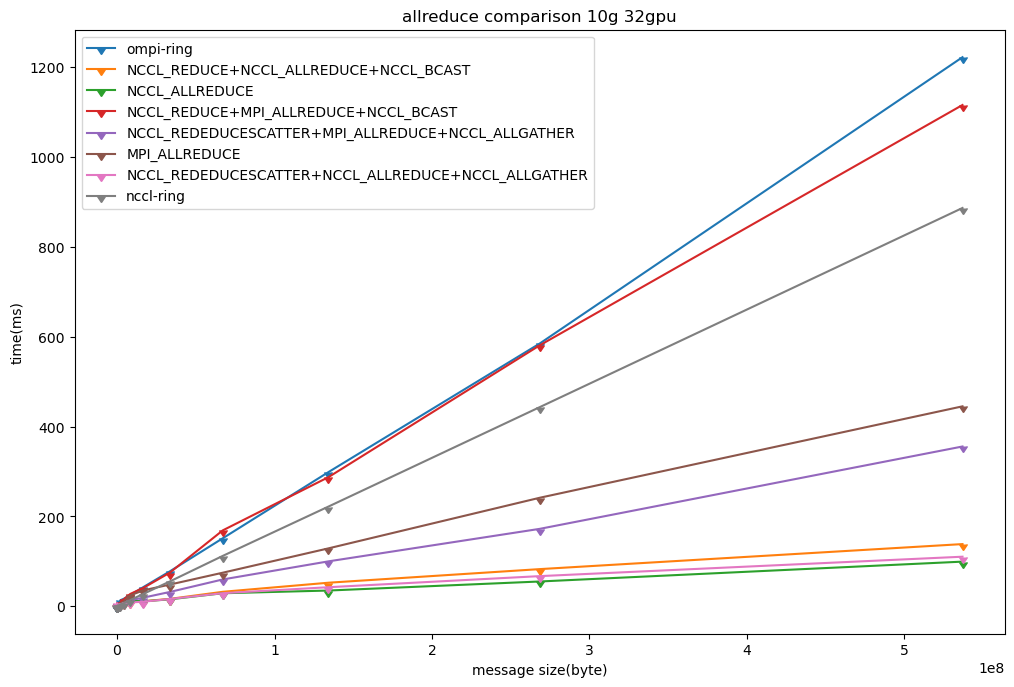

In [118]:
x, y = read_algo_with_head('data/ompi-32gpu-results/32gpus/10g/algo4-stepexp2.txt')
y = y * 1e-3

x7, y7 = read_algo_skip_head('data/nccl-results/nccl-32gpus/10g-stepexp2-2.txt', 707)
y7 = y7 * 1e-3


x1, y1 = read_hvd("./data/horovod-results/32gpu/10g-32gpu-nccl.txt")
x2, y2 = read_hvd("./data/horovod-results/32gpu/10g-32gpu-nccl-only.txt")
x3, y3 = read_hvd("./data/horovod-results/32gpu/10g-32gpu-2dmesh-4.txt")
x4, y4 = read_hvd("./data/horovod-results/32gpu/10g-32gpu-h-4.txt")
x5, y5 = read_hvd("./data/horovod-results/32gpu/10g-32gpu-mpi.txt")
x6, y6 = read_hvd("./data/horovod-results/32gpu/10g-32gpu-newnccl.txt")


x1 = x1 * 4
x2 = x2 * 4
x3 = x3 * 4
x4 = x4 * 4
x5 = x5 * 4
x6 = x6 * 4


x1 = x1[1:-3]
x2 = x2[1:-3]
x3 = x3[1:-3]
x4 = x4[1:-3]
x5 = x5[1:-3]
x6 = x6[1:-3]

y1 = y1[1:-3]
y2 = y2[1:-3]
y3 = y3[1:-3]
y4 = y4[1:-3]
y5 = y5[1:-3]
y6 = y6[1:-3]


plt.plot(x,y, marker=11, label='ompi-ring')
plt.plot(x1,y1, marker=11, label='NCCL_REDUCE+NCCL_ALLREDUCE+NCCL_BCAST')
plt.plot(x2,y2, marker=11, label='NCCL_ALLREDUCE')
plt.plot(x3,y3, marker=11, label='NCCL_REDUCE+MPI_ALLREDUCE+NCCL_BCAST')
plt.plot(x4,y4, marker=11, label='NCCL_REDEDUCESCATTER+MPI_ALLREDUCE+NCCL_ALLGATHER')
plt.plot(x5,y5, marker=11, label='MPI_ALLREDUCE')
plt.plot(x6,y6, marker=11, label='NCCL_REDEDUCESCATTER+NCCL_ALLREDUCE+NCCL_ALLGATHER')
plt.plot(x7,y7, marker=11, label='nccl-ring')


plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
plt.legend()
# mpi_allreduce
plt.title('allreduce comparison 10g 32gpu')
plt.show()



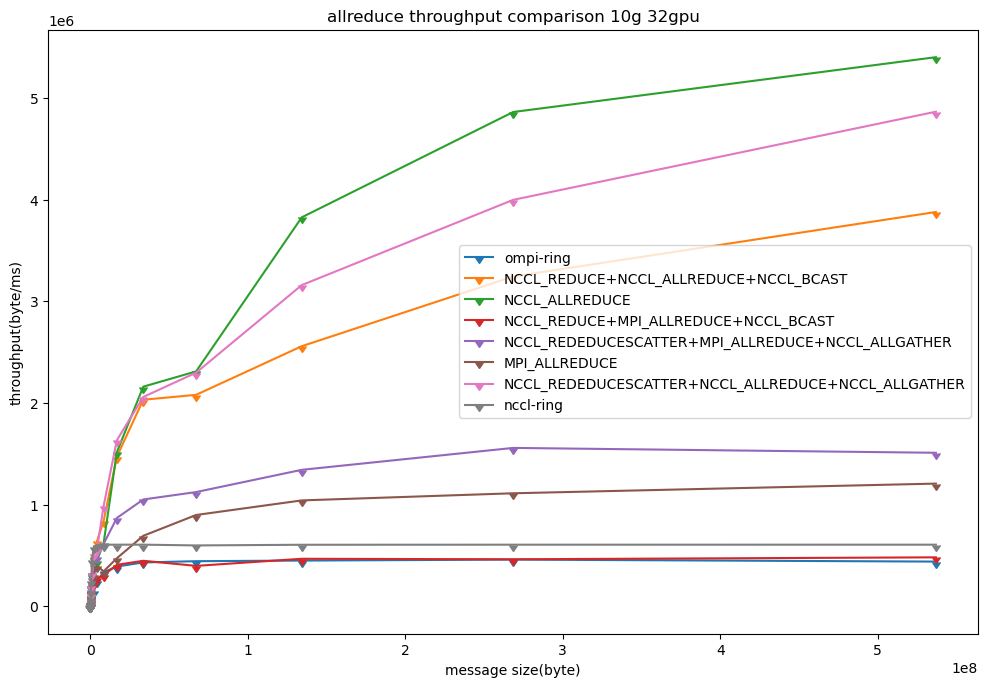

In [119]:
z = x/y
z1 = x1/y1
z2 = x2/y2
z3 = x3/y3
z4 = x4/y4
z5 = x5/y5
z6 = x6/y6
z7 = x7/y7

plt.plot(x,z, marker=11, label='ompi-ring')
plt.plot(x1,z1, marker=11, label='NCCL_REDUCE+NCCL_ALLREDUCE+NCCL_BCAST')
plt.plot(x2,z2, marker=11, label='NCCL_ALLREDUCE')
plt.plot(x3,z3, marker=11, label='NCCL_REDUCE+MPI_ALLREDUCE+NCCL_BCAST')
plt.plot(x4,z4, marker=11, label='NCCL_REDEDUCESCATTER+MPI_ALLREDUCE+NCCL_ALLGATHER')
plt.plot(x5,z5, marker=11, label='MPI_ALLREDUCE')
plt.plot(x6,z6, marker=11, label='NCCL_REDEDUCESCATTER+NCCL_ALLREDUCE+NCCL_ALLGATHER')
plt.plot(x7,z7, marker=11, label='nccl-ring')


plt.xlabel('message size(byte)')
plt.ylabel('throughput(byte/ms)')
plt.legend()
# mpi_allreduce
plt.title('allreduce throughput comparison 10g 32gpu')
plt.show()



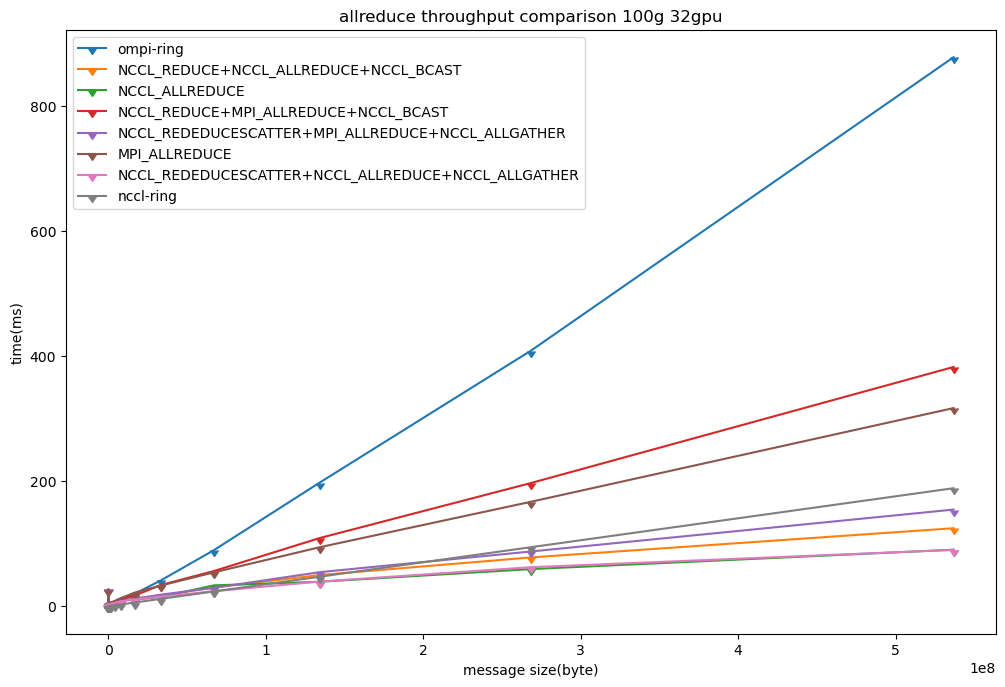

In [122]:
x, y = read_algo_with_head('data/ompi-32gpu-results/32gpus/100g/algo4-stepexp2.txt')
x1, y1 = read_hvd("./data/horovod-results/32gpu/100g-32gpu-nccl.txt")
x2, y2 = read_hvd("./data/horovod-results/32gpu/100g-32gpu-nccl-only.txt")
x3, y3 = read_hvd("./data/horovod-results/32gpu/100g-32gpu-2dmesh-4.txt")
x4, y4 = read_hvd("./data/horovod-results/32gpu/100g-32gpu-h-4.txt")
x5, y5 = read_hvd("./data/horovod-results/32gpu/100g-32gpu-mpi.txt")
x6, y6 = read_hvd("./data/horovod-results/32gpu/100g-32gpu-newnccl.txt")
x7, y7 = read_algo_skip_head('data/nccl-results/nccl-32gpus/100g-stepexp2-2.txt', 723)

y = y * 1e-3
y7 = y7 * 1e-3

x1 = x1 * 4
x2 = x2 * 4
x3 = x3 * 4
x4 = x4 * 4
x5 = x5 * 4
x6 = x6 * 4


x1 = x1[1:-3]
x2 = x2[1:-3]
x3 = x3[1:-3]
x4 = x4[1:-3]
x5 = x5[1:-3]
x6 = x6[1:-3]

y1 = y1[1:-3]
y2 = y2[1:-3]
y3 = y3[1:-3]
y4 = y4[1:-3]
y5 = y5[1:-3]
y6 = y6[1:-3]



plt.plot(x,y, marker=11, label='ompi-ring')
plt.plot(x1,y1, marker=11, label='NCCL_REDUCE+NCCL_ALLREDUCE+NCCL_BCAST')
plt.plot(x2,y2, marker=11, label='NCCL_ALLREDUCE')
plt.plot(x3,y3, marker=11, label='NCCL_REDUCE+MPI_ALLREDUCE+NCCL_BCAST')
plt.plot(x4,y4, marker=11, label='NCCL_REDEDUCESCATTER+MPI_ALLREDUCE+NCCL_ALLGATHER')
plt.plot(x5,y5, marker=11, label='MPI_ALLREDUCE')
plt.plot(x6,y6, marker=11, label='NCCL_REDEDUCESCATTER+NCCL_ALLREDUCE+NCCL_ALLGATHER')
plt.plot(x7,y7, marker=11, label='nccl-ring')




plt.xlabel('message size(byte)')
plt.ylabel('time(ms)')
plt.legend()
# mpi_allreduce
plt.title('allreduce throughput comparison 100g 32gpu')
plt.show()

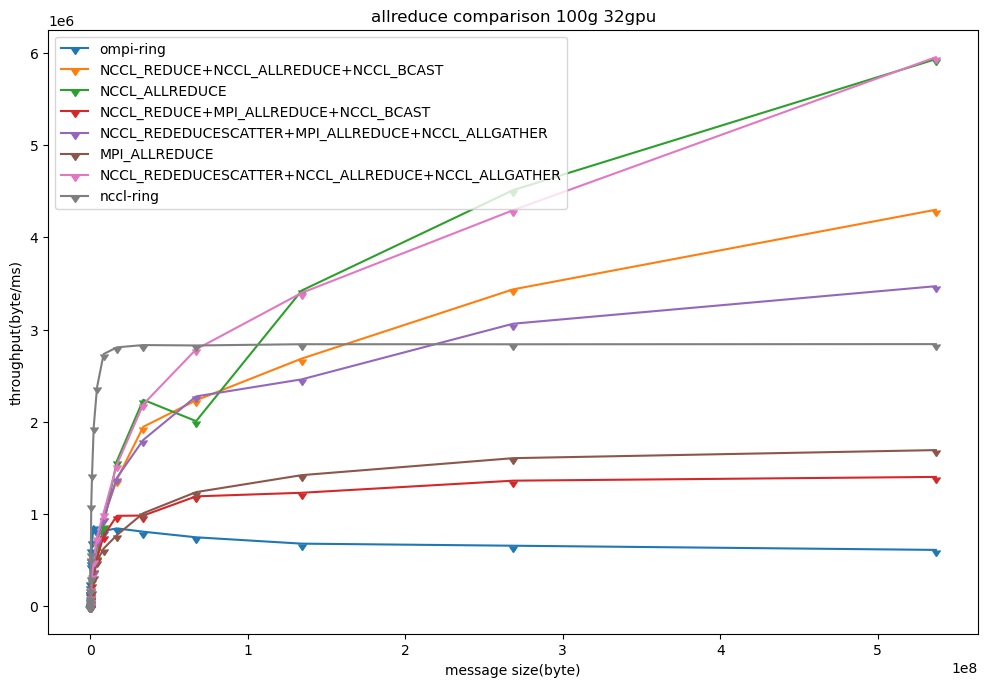

In [123]:
z = x/y
z1 = x1/y1
z2 = x2/y2
z3 = x3/y3
z4 = x4/y4
z5 = x5/y5
z6 = x6/y6
z7 = x7/y7

plt.plot(x,z, marker=11, label='ompi-ring')
plt.plot(x1,z1, marker=11, label='NCCL_REDUCE+NCCL_ALLREDUCE+NCCL_BCAST')
plt.plot(x2,z2, marker=11, label='NCCL_ALLREDUCE')
plt.plot(x3,z3, marker=11, label='NCCL_REDUCE+MPI_ALLREDUCE+NCCL_BCAST')
plt.plot(x4,z4, marker=11, label='NCCL_REDEDUCESCATTER+MPI_ALLREDUCE+NCCL_ALLGATHER')
plt.plot(x5,z5, marker=11, label='MPI_ALLREDUCE')
plt.plot(x6,z6, marker=11, label='NCCL_REDEDUCESCATTER+NCCL_ALLREDUCE+NCCL_ALLGATHER')
plt.plot(x7,z7, marker=11, label='nccl-ring')


plt.xlabel('message size(byte)')
plt.ylabel('throughput(byte/ms)')
plt.legend()
# mpi_allreduce
plt.title('allreduce comparison 100g 32gpu')
plt.show()

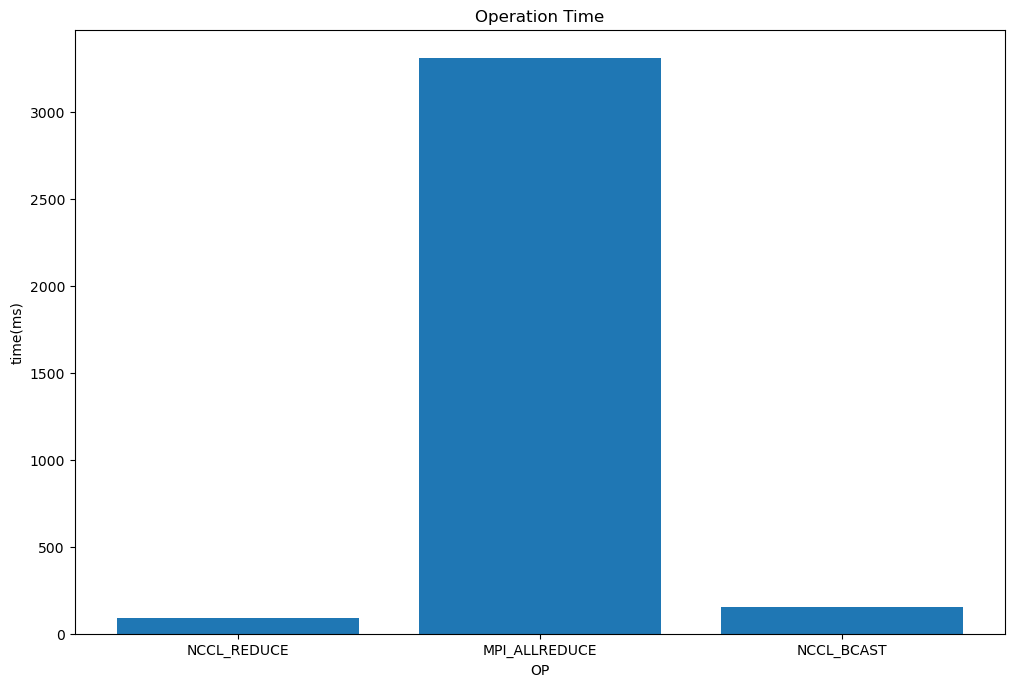

In [83]:
ops = ['NCCL_REDUCE', 'MPI_ALLREDUCE', 'NCCL_BCAST']
t = [88.690, 3308.915, 153.625]

plt.bar(ops, t)
plt.title('Operation Time')
plt.xlabel('OP')
plt.ylabel('time(ms)')
plt.show()

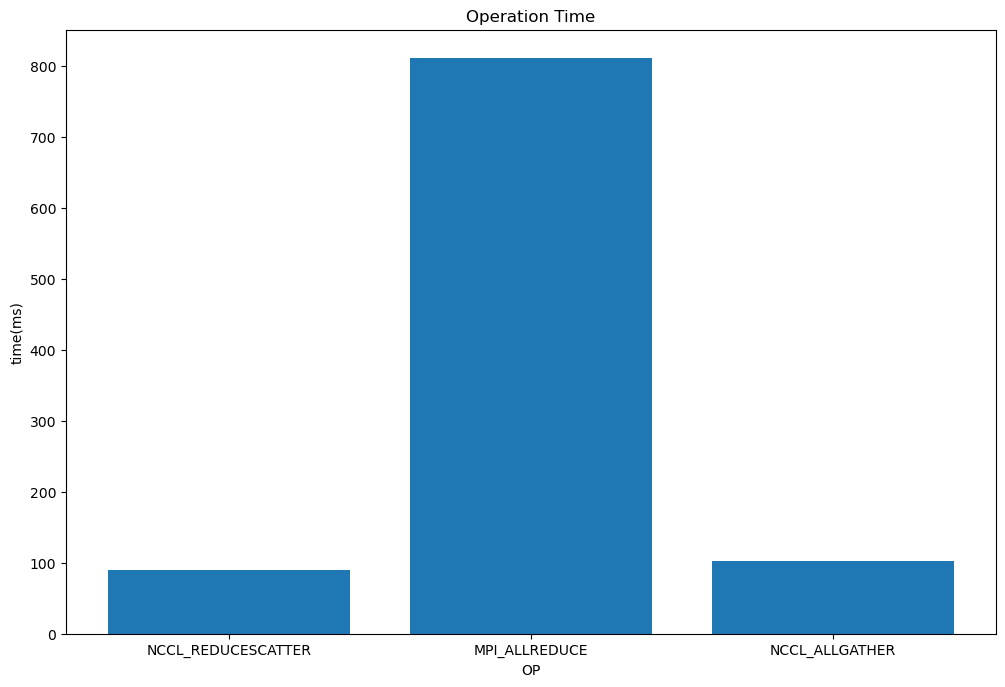

In [84]:
ops = ['NCCL_REDUCESCATTER', 'MPI_ALLREDUCE', 'NCCL_ALLGATHER']
t = [90.324, 810.733, 101.798]

plt.bar(ops, t)
plt.title('Operation Time')
plt.xlabel('OP')
plt.ylabel('time(ms)')
plt.show()

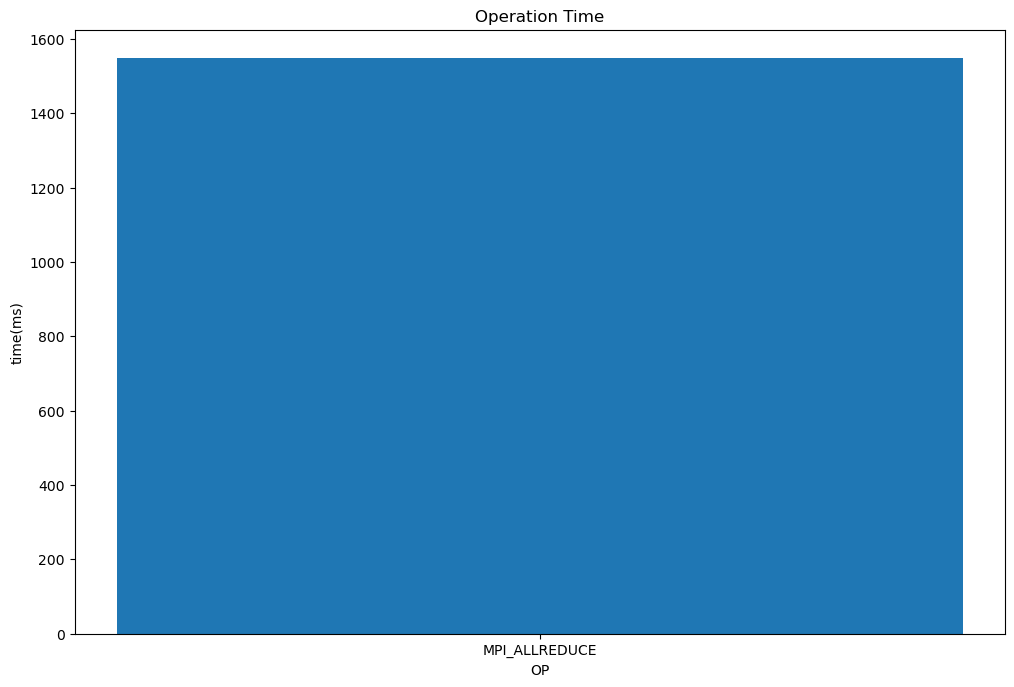

In [85]:
ops = ['MPI_ALLREDUCE']
t = [1547.685]

plt.bar(ops, t)
plt.title('Operation Time')
plt.xlabel('OP')
plt.ylabel('time(ms)')
plt.show()

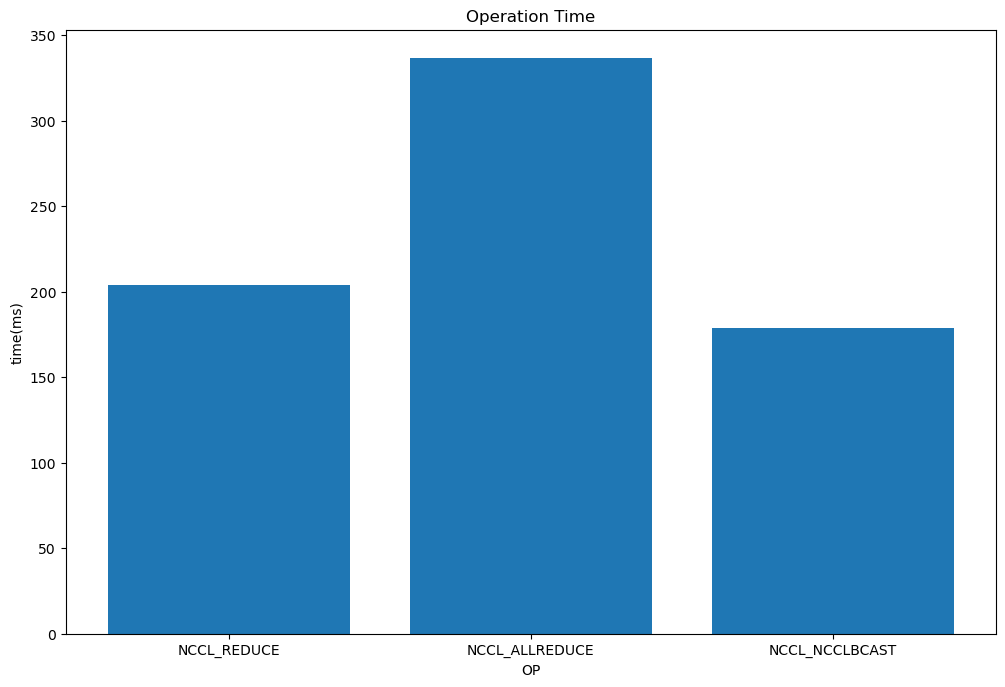

In [86]:
ops = ['NCCL_REDUCE', 'NCCL_ALLREDUCE', 'NCCL_NCCLBCAST']
t = [204.035, 336.320, 178.525]

plt.bar(ops, t)
plt.title('Operation Time')
plt.xlabel('OP')
plt.ylabel('time(ms)')
plt.show()

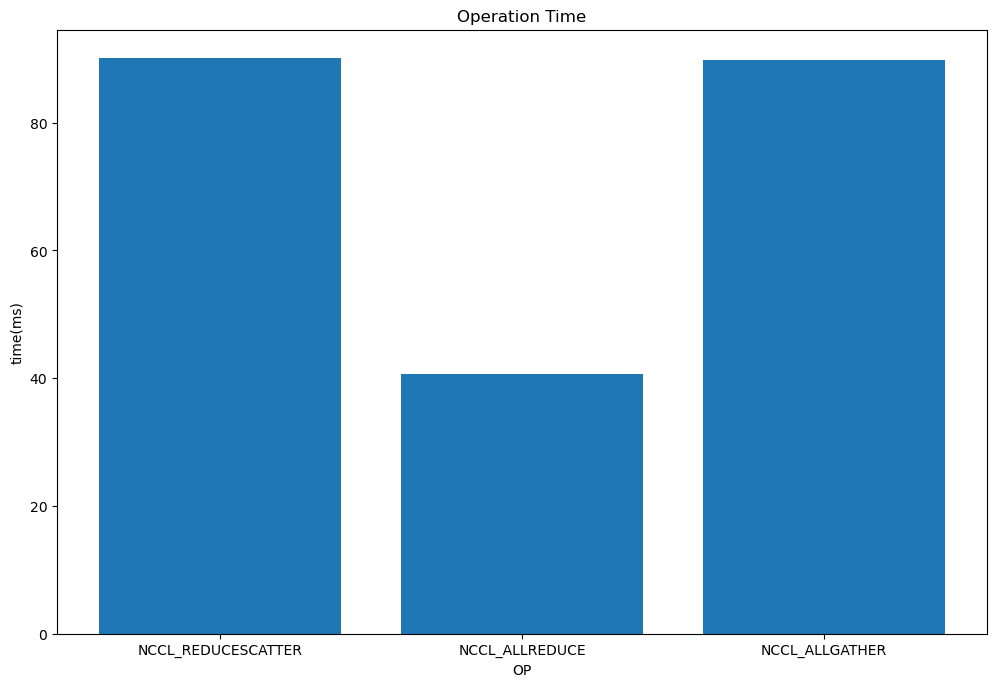

In [87]:
ops = ['NCCL_REDUCESCATTER', 'NCCL_ALLREDUCE', 'NCCL_ALLGATHER']
t = [90.053, 40.737, 89.783]

plt.bar(ops, t)
plt.title('Operation Time')
plt.xlabel('OP')
plt.ylabel('time(ms)')
plt.show()